In [144]:
%matplotlib inline

In [145]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [153]:
np.random.seed(20160418)

## Simulate a bivariate relationship

Let's simulate two variables, $X$ and $Y$, where $Y$ is a function of $X$ plus some independent noise.

In [154]:
npts = 25
X = np.linspace(0, 5, npts) + stats.norm.rvs(loc=0, scale=1, size=npts)

a = 1.0
b = 1.5
Y = b*X + a + stats.norm.rvs(loc=0, scale=2, size=npts)

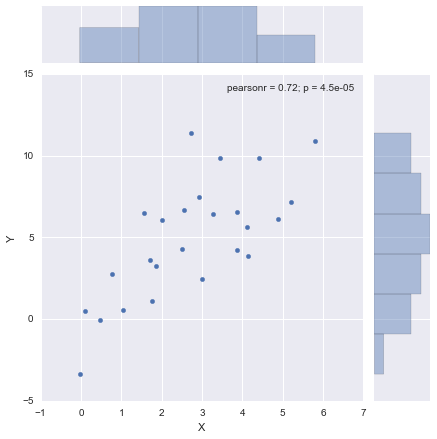

In [181]:
g = sbn.jointplot(X, Y)
g.set_axis_labels("X", "Y")
pass

# Linear Regression -- finding the line of "best fit"


What if we wanted to estimate the linear function that relates $Y$ to $X$? 

Linear functions are those whose graphs are straight lines. A linear function of a variable $x$ is usually written as: 

$$
 \hat{y} = f(x)  = bx + a
$$

where $a$ and $b$ are constants.  In  geometric terms $b$ is the slope of the line and $a$ is the value of the function when $x$ is zero (usually the referred to as the "y-intercept").


There are infinitely many such linear functions of $x$ we could define. Which line should we use if we want to be able to predict $y$?


## Regression Terminology

- **Predictors, explanatory, or independent variable** -- the variables upon which we want to make our prediction.

- **Outcomes, dependent, or response variable** -- the variable we are trying to predict/explain in our regression.

## The optimality criterion for least-squares regression

Find the linear function, $f(x)$, that minimizes

$$
\sum (y_i - f(x))^2
$$

i.e. find the linear function that minimizes the squared deviations in the $y$ direction.

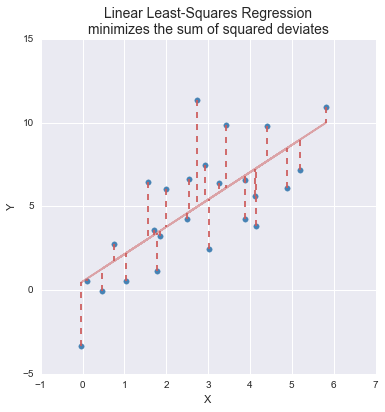

In [205]:
# calculate regression using built-in scipy.stats.linregress
# we'll show the underlying calculations later in the notebook

rgr = stats.linregress(X,Y)
b = rgr.slope
a = rgr.intercept

# plot scatter
plt.scatter(X, Y, color='steelblue', s=30)

# plot regression line
plt.plot(X, b*X + a, color='indianred', alpha=0.5)

# plot lines from regression to actual value
for (x,y) in zip(X, Y):
    plt.vlines(x, y, b*x + a, linestyle='dashed', color='indianred')

plt.xlabel("X")
plt.ylabel("Y")
plt.gcf().set_size_inches(6,6)

plt.title("Linear Least-Squares Regression\nminimizes the sum of squared deviates",fontsize=14)
pass

### Solution for the least-squares criterion

The slope, $b$, and intercept, $a$, that minimize this quantity are:

\begin{align}
b &= \frac{s_{xy}}{s^2_x} = r_{xy}\frac{s_y}{s_x}\\
\\
a &= \overline{y} - b\overline{x}
\end{align}






Estimated slope, b: 1.63121981646
Estimated intercept, a: 0.512242609708


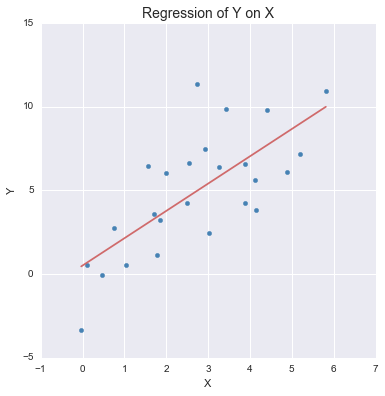

In [178]:
# here's a simple function to calculate the least squares regression of Y on X

def lsqr_regression(X, Y):
    covxy = np.cov(X, Y, ddof=1)[0,1]
    varx = np.var(X, ddof=1)
    b = covxy/varx
    a = np.mean(Y) - b * np.mean(X)
    return b, a


def plot_regression_line(X, Y, b, a, axis, **kw):
    minx = min(X)
    maxx = max(X)
    yhatmin = b*minx + a
    yhatmax = b*maxx + a
    axis.plot((minx,maxx), (yhatmin, yhatmax), marker=None, **kw)


b, a = lsqr_regression(X, Y)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X, Y, color='steelblue')
plot_regression_line(X, Y, b, a, ax, color='indianred', alpha=0.9)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Regression of Y on X",fontsize=14)

print("Estimated slope, b:", b)
print("Estimated intercept, a:", a)
pass

## Residuals

Residuals are the difference between the observed value of $y$ and the predicted value.  You can think of residuals as the proportion of $y$ unaccounted for by the regression. 

$$
residuals = y - \hat{y}
$$

When the linear regression model is appropriate, residuals should should centered around zero and shoud show no strong trends or extreme differences in spread for different values of $x$.

In [176]:
# yhat is the predicted values of y from x
Yhat = b * X + a

# residuals are the differnce between predicted and actual
residuals = Y - Yhat

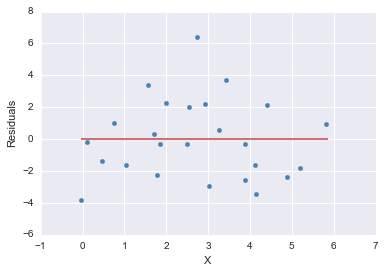

In [177]:
plt.scatter(X, residuals, color='steelblue')
plt.hlines(0, min(X)*0.99, max(X)*1.01,color='indianred')
plt.xlabel("X")
plt.ylabel("Residuals")
pass

## Regression as sum-of-squares decomposition

Like ANOVA, regression can be viewed as a decomposition of the sum-of-squares deviances.

$$
ss(y) = ss(\hat{y}) + ss(residuals)
$$

In [182]:

ssy = np.sum((Y - np.mean(Y))**2)
ssyhat = np.sum((Yhat - np.mean(Yhat))**2)
ssresiduals = np.sum((residuals - np.mean(residuals))**2)

print("SSTotal:", ssy)
print("SSYhat:", ssyhat)
print("SSResiduals:", ssresiduals)
print("SSYhat + SSresiduals:", ssyhat + ssresiduals)

SSTotal: 314.736178077
SSYhat: 164.297241554
SSResiduals: 150.438936523
SSYhat + SSresiduals: 314.736178077


## Regression confidence intervals

To understand regression confidence intervals, let's simulate the sampling distribution of the slope and intercept.  For this simulation we will hold $X$ fixed, and repeatedly generate samples of $Y$.

In [183]:
npts = 25
x = np.linspace(0,5,npts) + stats.norm.rvs(loc=0, scale=2, size=npts)

A = 1
B = 1.5

slopes = []
intercepts = []
yhat = []

nsims = 1000
for i in range(nsims):
    y = B*x + A + stats.norm.rvs(loc=0, scale=2, size=npts) 
    b = np.corrcoef(x,y,ddof=1)[0,1] * (np.std(y,ddof=1)/np.std(x,ddof=1))
    a = np.mean(y) - b * np.mean(x)
    yhat.append(b * x + a)
    slopes.append(b)
    intercepts.append(a)

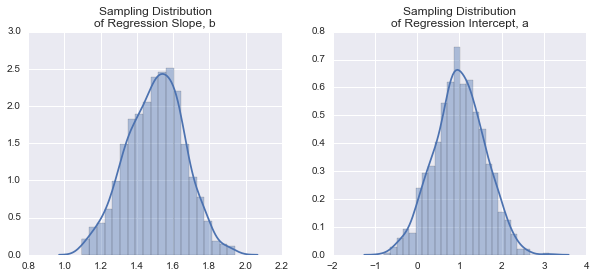

In [184]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
sbn.distplot(slopes, ax=ax1)
sbn.distplot(intercepts, ax=ax2)
ax1.set_title('Sampling Distribution\nof Regression Slope, b')
ax2.set_title('Sampling Distribution\nof Regression Intercept, a')
pass

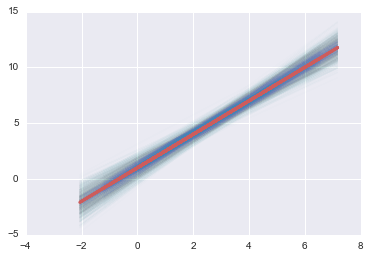

In [185]:
for r in yhat:
    plt.plot(x, r, alpha=0.0075, color='steelblue', marker=None, linewidth=1)
plt.plot(x, B*x + A, color='indianred', marker=None, linewidth=3)
pass

In [187]:
b_ci95low = np.percentile(slopes, 5)
b_ci95hi = np.percentile(slopes, 95)

a_ci95low = np.percentile(intercepts, 5)
a_ci95hi = np.percentile(intercepts, 95)

print("95% CI for slope of regression:", (b_ci95low, b_ci95hi))
print("95% CI for intercepts of regression:", (a_ci95low, a_ci95hi))

95% CI for slope of regression: (1.2360622634368787, 1.7573708425951899)
95% CI for intercepts of regression: (-0.0026930755016096814, 1.955183865898021)


### Seaborn will automatically draw CIs for you

The `seaborn.regplot` function will draw the bivariate scatter, the corresponding linear regression, and confidence interval for you.

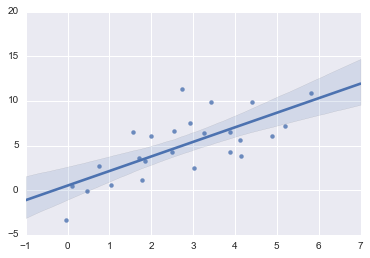

In [189]:
rp = sbn.regplot(X, Y)
pass

# Illustration of regression with Iris data

In [12]:
url = "http://roybatty.org/iris.csv"
iris = pd.read_csv(url)
iris.columns = iris.columns.str.replace('.',"_")

In [4]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
setosa = iris.query('Species == "setosa"')
setosa.shape

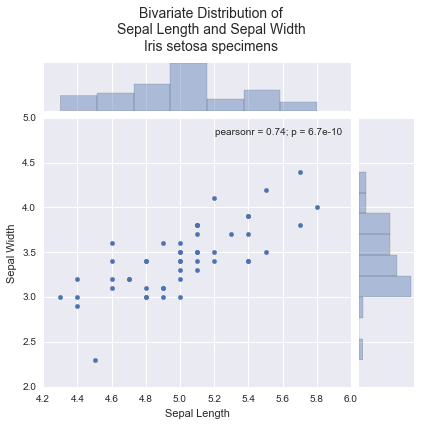

In [68]:
g = sbn.jointplot(setosa.Sepal_Length, setosa.Sepal_Width, space=0.15,)
g.set_axis_labels("Sepal Length", "Sepal Width")
plt.subplots_adjust(top=0.85)  # adjust top of subplots relative to figure so there is room for title
g.fig.suptitle("Bivariate Distribution of\nSepal Length and Sepal Width\nIris setosa specimens", fontsize=14)
pass

In [207]:
rgr = stats.linregress(setosa.Sepal_Length, setosa.Sepal_Width)
print("Regression slope:", rgr.slope)
print("Regression intercept:", rgr.intercept)
print("Regression R:", rgr.rvalue)

Regression slope: 0.798528300647
Regression intercept: -0.56943267304
Regression R: 0.742546685665


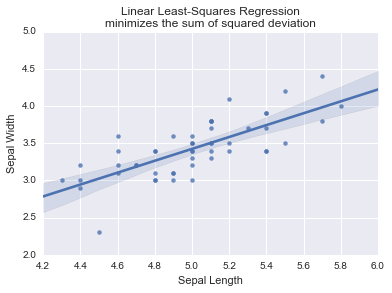

In [208]:
sbn.regplot(setosa.Sepal_Length, setosa.Sepal_Width)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Linear Least-Squares Regression\nminimizes the sum of squared deviation")
pass

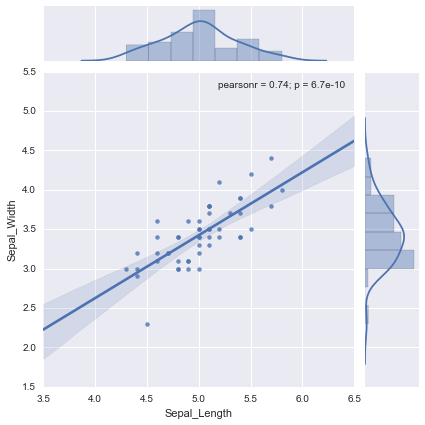

In [213]:
sbn.jointplot(setosa.Sepal_Length, setosa.Sepal_Width, kind="reg")
pass